In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###EDA

In [280]:
train = pd.read_csv('train_PDjVQMB.csv')
test = pd.read_csv('test_lTY72QC.csv')

In [282]:
test_id = test.iloc[:,0]
train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [190]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [191]:
print('Shape of train data',train.shape)
print('Shape of test data',test.shape)

Shape of train data (6650, 10)
Shape of test data (2851, 9)


In [192]:
print(train.isna().sum())
print('*'*100)
print(test.isna().sum())

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64
****************************************************************************************************
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64


There are no missing data in train and test 

Age

In [193]:
count = np.sort(train['Age'].value_counts())
age = list(train['Age'].value_counts().index)

<BarContainer object of 52 artists>

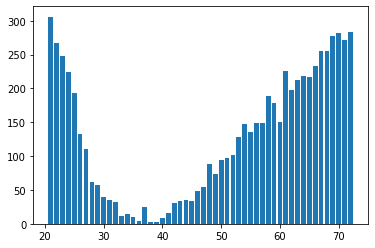

In [194]:
plt.bar(age,count)

We can see that people in the range 30-40 are less in number , where as Customers of age around 20-21 are more in number

In [195]:
print(train['Age'].max())
print(train['Age'].min())
print(train['Age'].mean())

72
21
41.130225563909775


1. max age = 72 
2. min age = 21 
3. average people age = 41.13

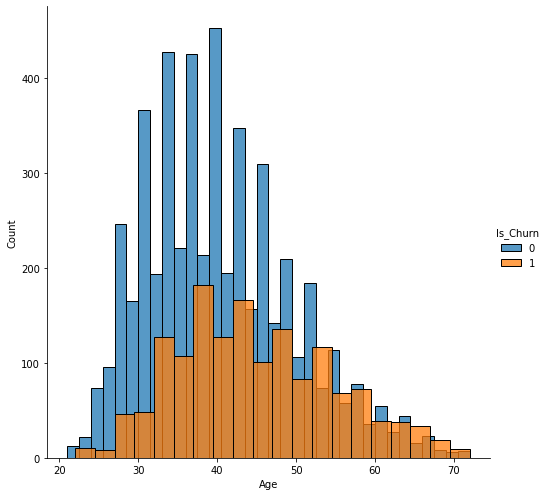

In [196]:
sns.FacetGrid(train,hue = 'Is_Churn',height = 7).map(sns.histplot,'Age').add_legend()

Customers of age range 35 - 45 are more likely to have churn = 1

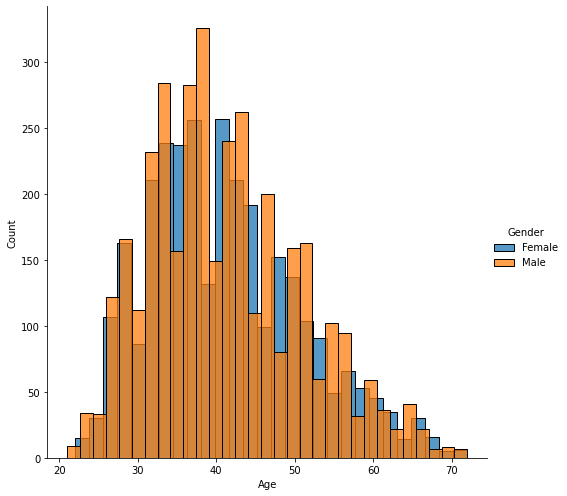

In [197]:
sns.FacetGrid(train,hue = 'Gender',height = 7).map(sns.histplot,'Age').add_legend()

Male Customers are more likely to have churn = 1

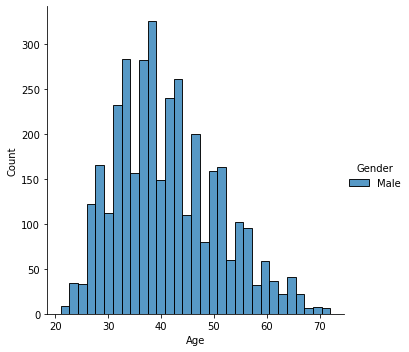

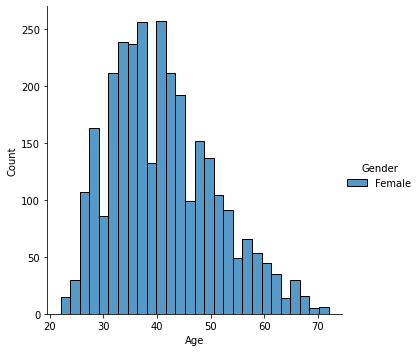

In [198]:
sns.FacetGrid(train[:][train['Gender']=='Male'],hue = 'Gender',height = 5).map(sns.histplot,'Age').add_legend()
sns.FacetGrid(train[:][train['Gender']=='Female'],hue = 'Gender',height = 5).map(sns.histplot,'Age').add_legend()

1. Both male and female customers of middle age are more in number

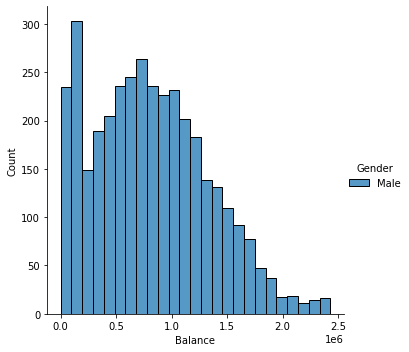

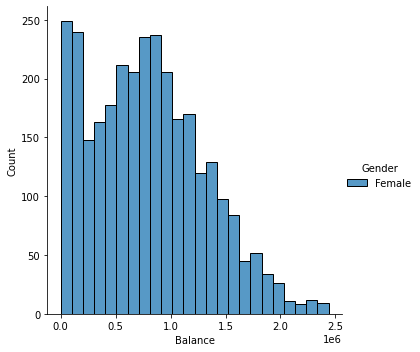

In [199]:
sns.FacetGrid(train[:][train['Gender']=='Male'],hue = 'Gender',height = 5).map(sns.histplot,'Balance').add_legend()
sns.FacetGrid(train[:][train['Gender']=='Female'],hue = 'Gender',height = 5).map(sns.histplot,'Balance').add_legend()

1. We can see that people with low balance are more in number and less customers with high balance

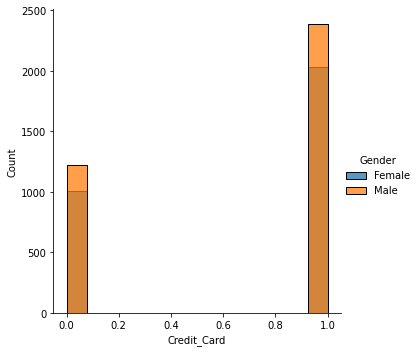

In [200]:
sns.FacetGrid(train,hue = 'Gender',height = 5).map(sns.histplot,'Credit_Card').add_legend()
#sns.FacetGrid(train[:][train['Gender']=='Female'],hue = 'Gender',height = 5).map(sns.histplot,'Credit_Card').add_legend()

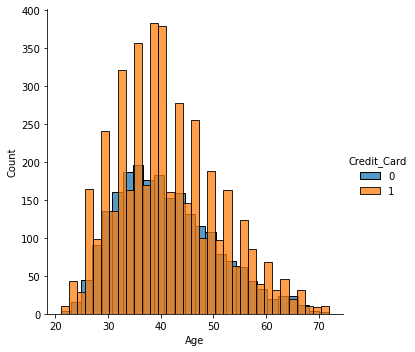

In [201]:
sns.FacetGrid(train,hue = 'Credit_Card',height = 5).map(sns.histplot,'Age').add_legend()

People of age range 30-50 are more likely to have Credit_card

Male Customers with credit card are more in number

Income

In [202]:
print(train['Income'].value_counts())

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64


<BarContainer object of 4 artists>

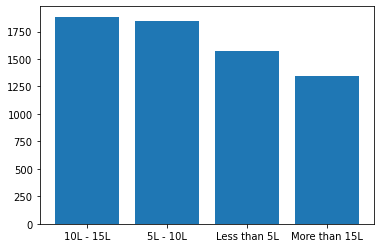

In [203]:
plt.bar(train['Income'].value_counts().index,train['Income'].value_counts())

income range 10L-15L has more number of ids 
where as more than 15L are less in number

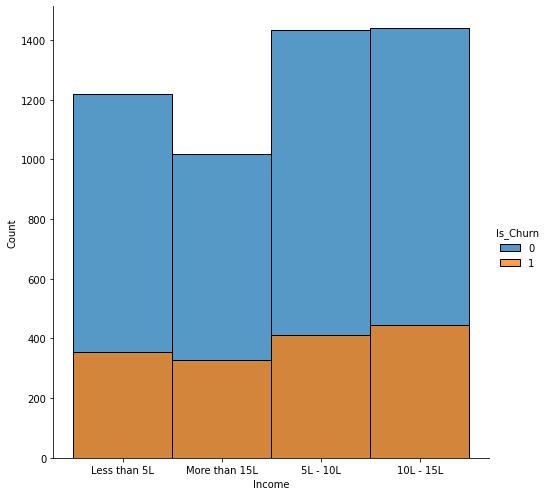

In [204]:
sns.FacetGrid(train,hue = 'Is_Churn',height = 7).map(sns.histplot,'Income').add_legend()

We can see that 10L-15L has more of Churn rate

Balance

In [205]:
train['Balance']

0        563266.44
1        875572.11
2        701607.06
3       1393922.16
4        893146.23
           ...    
6645    1354526.19
6646     596286.54
6647     979298.19
6648     395233.65
6649     826947.27
Name: Balance, Length: 6650, dtype: float64

PDF , CDF of Balance

[0.17308271 0.13172932 0.16796992 0.1712782  0.14165414 0.09849624
 0.06255639 0.03218045 0.01218045 0.00887218]
[0.17308271 0.30481203 0.47278195 0.64406015 0.78571429 0.88421053
 0.94676692 0.97894737 0.99112782 1.        ]


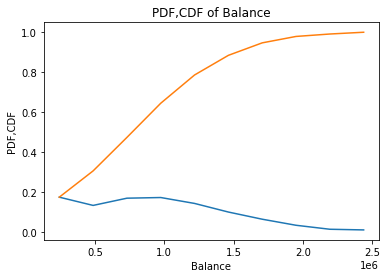

In [206]:
counts,bin_edges = np.histogram(train['Balance'],bins=10,density=True)
pdf = counts/np.sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of Balance')
plt.xlabel('Balance')
plt.ylabel('PDF,CDF')
plt.show()

We can see that most of the people are having balance in the range 0.5e6 - 1e6

Minimum Balance 63.0
Maximum Balance 2436615.81
Mean Balance 804595.354984962


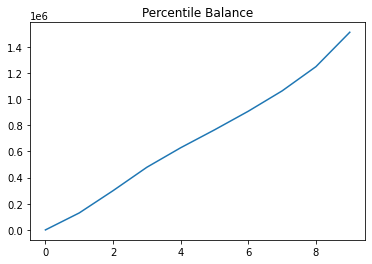

In [207]:
print('Minimum Balance',train['Balance'].min())
print('Maximum Balance',train['Balance'].max())
print('Mean Balance',train['Balance'].mean())
plt.title('Percentile Balance')
plt.plot(np.percentile(train['Balance'],np.arange(0,100,10)))

In [208]:
print(train['Balance'].value_counts())

117549.00     2
76122.00      2
131121.00     2
102123.00     2
138825.00     2
             ..
289348.92     1
1031298.48    1
242901.27     1
719339.85     1
826947.27     1
Name: Balance, Length: 6643, dtype: int64


Vintage

In [209]:
print(train['Vintage'].value_counts())

3    1405
1    1354
2    1328
4    1296
0     956
5     311
Name: Vintage, dtype: int64


We can see that very few people are having bank account from 5 years , Majority are having account from 3 years

FacetGrid : Vintage

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


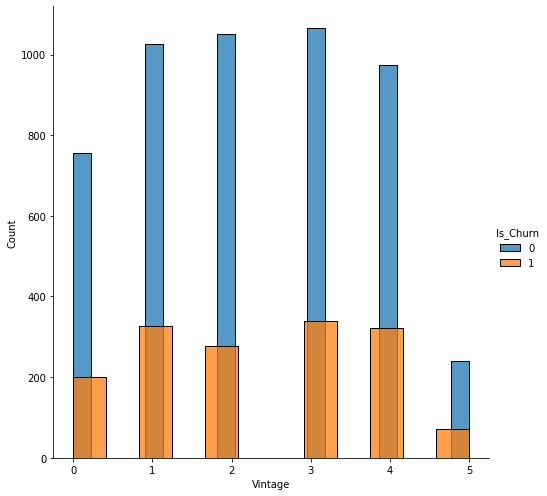

In [210]:
sns.FacetGrid(train,hue = 'Is_Churn',size = 7).map(sns.histplot,'Vintage').add_legend()

We can see that people with Vintage 1 and 3 are having highest Churn rate, 5 has low churn rate

Grouping Vintage Based on Mean Churn 

In [211]:
train[['Vintage','Is_Churn']].groupby(by = 'Vintage').mean()

,Is_Churn
Vintage,
0,0.210251
1,0.242245
2,0.207831
3,0.241281
4,0.247685
5,0.231511


We can Concluded from above graph that Vintage 4 has highest 0:1 ratio , i e percentage of Churn is more in 4

Transaction Status

In [212]:
train['Transaction_Status'].value_counts()

1    3430
0    3220
Name: Transaction_Status, dtype: int64

FacetGrid : Transaction_Status

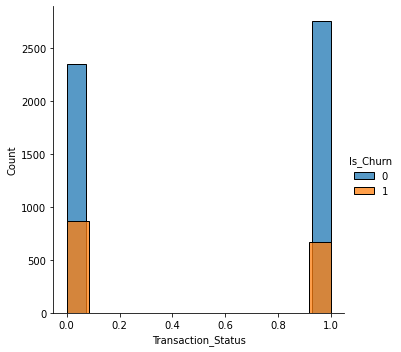

In [213]:
sns.FacetGrid(train,hue = 'Is_Churn', height = 5).map(sns.histplot,'Transaction_Status').add_legend()

Customer with no transaction from past 3 months are more likely to churn 

Income & Transaction_Status

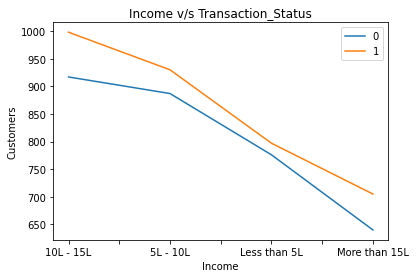

In [214]:
d = train['Income'][train['Transaction_Status']==0].value_counts()
d.plot(label = 0)
d = train['Income'][train['Transaction_Status']==1].value_counts()
d.plot(label = 1)
plt.legend()
plt.title('Income v/s Transaction_Status')
plt.xlabel('Income')
plt.ylabel('Customers')
plt.show()

1. We can see that customers with Income range 10L-15L are more likely to have made transaction in last 3 months

In [215]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


Product_Holdings

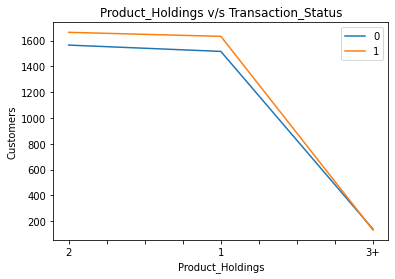

In [216]:
d = train['Product_Holdings'][train['Transaction_Status']==0].value_counts()
d.plot(label = 0)
d = train['Product_Holdings'][train['Transaction_Status']==1].value_counts()
d.plot(label = 1)
plt.legend()
plt.title('Product_Holdings v/s Transaction_Status')
plt.xlabel('Product_Holdings')
plt.ylabel('Customers')
plt.show()

1. we can see that both Transaction_Status 1 and 0 are having similar pattern
2. Most of the Customers are having 2 product holdings
3. Very few are having 3+ product holdings

FacetGrid: Product_Holdings

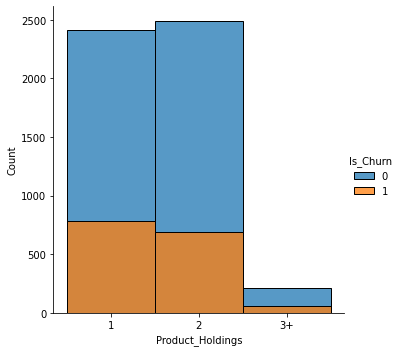

In [217]:
sns.FacetGrid(train,hue='Is_Churn',height=5).map(sns.histplot,'Product_Holdings').add_legend()

1. Customer with 1 product_holdings are more likely to have churn = 1

FacetGrid : product_holdings vs balance

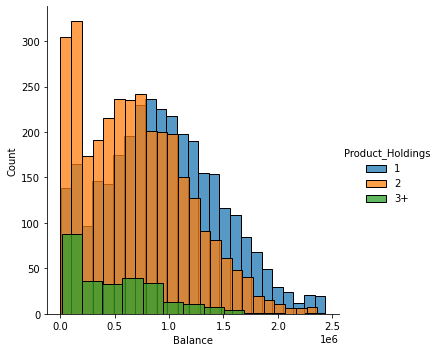

In [218]:
sns.FacetGrid(train,hue='Product_Holdings',height=5).map(sns.histplot,'Balance').add_legend()

1. Customers with less Balance are having 2 product Holdings
2. Customers with more Balance are having 1 Product Holdings


Credit card

In [219]:
train['Credit_Card'].value_counts()

1    4418
0    2232
Name: Credit_Card, dtype: int64

Many people are having credit card

Credit_card vs Is_Churn

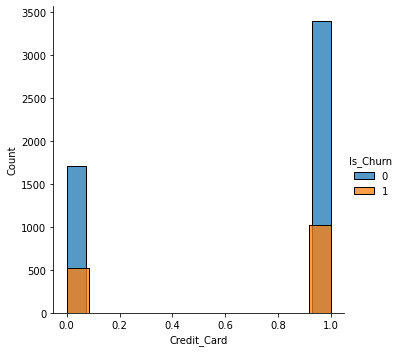

In [220]:
sns.FacetGrid(train,hue='Is_Churn',height=5).map(sns.histplot,'Credit_Card').add_legend()

Credit card vs Income

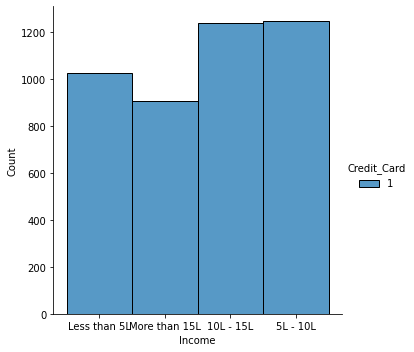

In [221]:
sns.FacetGrid(train[['Credit_Card','Income']][train['Credit_Card']==1],hue='Credit_Card',height=5).map(sns.histplot,'Income').add_legend()

1. Customers with income in the range 5L-10L are more likely to have a credit card
2. Customers with income more than 15L are less likely to have a credit card 


Credit Card vs Balance

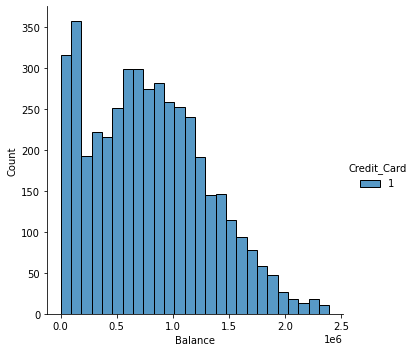

In [222]:
sns.FacetGrid(train[['Credit_Card','Balance']][train['Credit_Card']==1],hue='Credit_Card',height=5).map(sns.histplot,'Balance').add_legend()

1. Customers with less Balance are more likely to use Credit_card

Credit_score

In [223]:
train['Credit_Category'].value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

Most customers are having Poor Credit score

Credit_Category vs is_churned

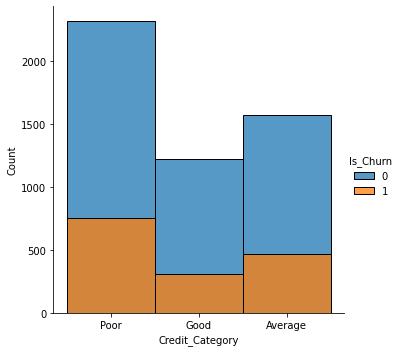

In [224]:
sns.FacetGrid(train,hue='Is_Churn',height=5).map(sns.histplot,'Credit_Category').add_legend()

People with Poor Category are more likely to churn 

In [225]:
d = train[['Balance','Credit_Category']][train['Credit_Category']=='Poor']

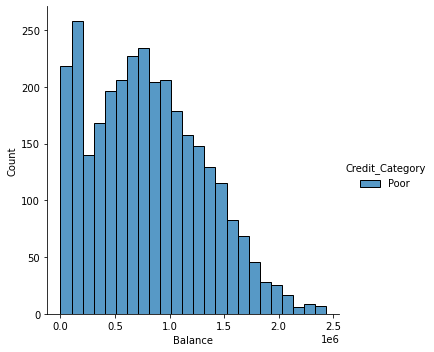

In [226]:
sns.FacetGrid(d,hue='Credit_Category',height=5).map(sns.histplot,'Balance').add_legend()

In [227]:
target = train['Is_Churn']
#train = train.drop(labels=['Is_Churn'],axis = 1,inplace = True)

In [228]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [229]:
train = train.iloc[:,:-1]

In [230]:
print(train.shape,len(target))
print(test.shape)

(6650, 9) 6650
(2851, 9)


###Feature Transformation

Categorizing gender feature

Gender

train

In [232]:
for i in range(len(train)):
  if train.loc[i,'Gender'] == 'Male':
    train.loc[i,'Gender'] = 1
  else :
    train.loc[i,'Gender'] = 0

In [233]:
train.loc[:,'Gender'].value_counts()

1    3612
0    3038
Name: Gender, dtype: int64

test

In [245]:
for i in range(len(test)):
  if test.loc[i,'Gender'] == 'Male':
    test.loc[i,'Gender'] = 1
  else :
    test.loc[i,'Gender'] = 0

In [247]:
test['Gender'].value_counts()

1    1545
0    1306
Name: Gender, dtype: int64

Income

train

In [234]:
for i in range(len(train)):
  if train.loc[i,'Income'] == 'Less than 5L':
    train.loc[i,'Income'] = 0
  elif train.loc[i,'Income'] == 'More than 15L':
    train.loc[i,'Income'] = 3
  elif train.loc[i,'Income'] == '5L - 10L':
    train.loc[i,'Income'] = 1
  elif train.loc[i,'Income'] == '10L - 15L':
    train.loc[i,'Income'] = 2

In [235]:
train['Income'].value_counts()

2    1885
1    1847
0    1573
3    1345
Name: Income, dtype: int64

test

In [248]:
for i in range(len(test)):
  if test.loc[i,'Income'] == 'Less than 5L':
    test.loc[i,'Income'] = 0
  elif test.loc[i,'Income'] == 'More than 15L':
    test.loc[i,'Income'] = 3
  elif test.loc[i,'Income'] == '5L - 10L':
    test.loc[i,'Income'] = 1
  elif test.loc[i,'Income'] == '10L - 15L':
    test.loc[i,'Income'] = 2
test['Income'].value_counts()

2    844
1    794
0    648
3    565
Name: Income, dtype: int64

Product_Holdings

In [265]:
for i in range(len(train)):
  if train.loc[i,'Product_Holdings'] =='3+':
    train.loc[i,'Product_Holdings'] = 3
  if train.loc[i,'Product_Holdings'] =='1':
    train.loc[i,'Product_Holdings'] = 1
  if train.loc[i,'Product_Holdings'] =='2':
    train.loc[i,'Product_Holdings'] = 2
for i in range(len(test)):
  if test.loc[i,'Product_Holdings'] =='3+':
    test.loc[i,'Product_Holdings'] = 3
  if test.loc[i,'Product_Holdings'] =='1':
    test.loc[i,'Product_Holdings'] = 1
  if test.loc[i,'Product_Holdings'] =='2':
    test.loc[i,'Product_Holdings'] = 2

Credit_Category

train

In [249]:
for i in range(len(train)):
  if train.loc[i,'Credit_Category'] == 'Poor':
    train.loc[i,'Credit_Category'] = 0
  elif train.loc[i,'Credit_Category'] == 'Average':
    train.loc[i,'Credit_Category'] = 1
  elif train.loc[i,'Credit_Category'] == 'Good':
    train.loc[i,'Credit_Category'] = 2
train['Credit_Category'].value_counts()

0    3076
1    2043
2    1531
Name: Credit_Category, dtype: int64

test

In [250]:
for i in range(len(test)):
  if test.loc[i,'Credit_Category'] == 'Poor':
    test.loc[i,'Credit_Category'] = 0
  elif test.loc[i,'Credit_Category'] == 'Average':
    test.loc[i,'Credit_Category'] = 1
  elif test.loc[i,'Credit_Category'] == 'Good':
    test.loc[i,'Credit_Category'] = 2
test['Credit_Category'].value_counts()

0    1270
1     866
2     715
Name: Credit_Category, dtype: int64

Balance Min Max Scaling

Train

In [253]:
min = int(train['Balance'].min())
#print(min)
max = int(train['Balance'].max())
#print(max)
l = len(train)
for i in range(l):
  amt = train.loc[i,'Balance']
  amt = (amt-min)/(max-min)
  train.loc[i,'Balance'] = amt

In [254]:
train['Balance'].head()

0    0.231148
1    0.359323
2    0.287925
3    0.572062
4    0.366536
Name: Balance, dtype: float64

Test

In [255]:
min = int(test['Balance'].min())
#print(min)
max = int(test['Balance'].max())
#print(max)
l = len(test)
for i in range(l):
  amt = test.loc[i,'Balance']
  amt = (amt-min)/(max-min)
  test.loc[i,'Balance'] = amt

In [256]:
test['Balance'].head()

0    0.413891
1    0.139709
2    0.179983
3    0.011128
4    0.453304
Name: Balance, dtype: float64

Target

In [274]:
target.value_counts()
print('{}% of Custormers are having Is_churn = 0'.format(target.value_counts()[0]/len(target)))
print('{}% of Custormers are having Is_churn = 1'.format(target.value_counts()[1]/len(target)))

0.7688721804511278% of Custormers are having Is_churn = 0
0.23112781954887218% of Custormers are having Is_churn = 1


Base Models

In [268]:
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = train_test_split(train,target,test_size = 0.2)

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/preprocessing.html

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)

Text(0.5, 1.0, 'Confusion Matrix : data2 cv')

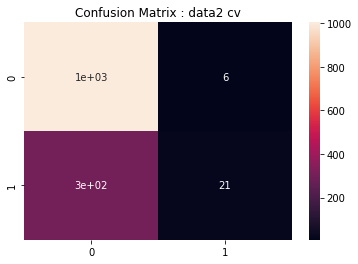

In [270]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : data2 cv')

In [275]:
from sklearn.metrics import f1_score
f1_score(y_cv, y_cv_pred, average='macro')

0.4945870415431635

In [276]:
y_test_pred = pipe.predict(test)

In [300]:
y_test_pred

array([0, 0, 0, ..., 1, 0, 0])

In [312]:
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub1.csv')

In [313]:
output1

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
...,...,...
2846,19e40adf,0
2847,52d5bc8d,0
2848,f708121b,1
2849,f008715d,0


In [315]:
output1.isna().sum()

ID          0
Is_Churn    0
dtype: int64

In [314]:
from google.colab import files
files.download('ChurnSub1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can see that the data is Imbalance in nature

Customer with Credit card are more liked to have churn = 1